In [1]:
import jax.numpy as jnp
import jax
import jaxopt
import numpy as np

import matplotlib.pyplot as plt

import optimization_SPDC as opt
import get_initialization_cond as init

key = jax.random.PRNGKey(0)

from jax import config
config.update("jax_enable_x64", True)

In [2]:
Np = 0.01
# higher N and wf+wi makes less unstable pump... need to see if N or wf+wi influences more
N = 601
wi = -10
wf = 10
x = jnp.linspace(wi, wf, N)
freq_range_pump = jnp.linspace(2*wi, 2*wf, 2*N)
freq_range_pump_complex = jnp.concatenate((freq_range_pump, freq_range_pump)).reshape(4*N,)
vp = 0.1
l = 1
# Parameters to generate pump seed
hermite_order = 2
gaussian_amplitude = 0.05
gaussian_width = 0.3
phase = jnp.pi/5
hermite_init_params = [hermite_order, gaussian_amplitude, gaussian_width, phase]
cst_init_params = [0.1]
y_N = 3

In [3]:
alpha, G, H = init.get_constants(vp, l, wi, wf, Np, N = N)
arbitrary_seed_hermite = init.get_initialization_array(hermite_init_params, vp, l, wi, wf, Np, method='hermite', N = N)
random_seed = Np*jax.random.uniform(key, shape=(4*N,))

In [4]:
solver = jaxopt.GradientDescent(opt.get_loss_K, maxiter=30, verbose = 1)

In [5]:
(theta, state) = solver.run(random_seed, N, alpha, G, H, l, freq_range_pump)

error: 64.1348875310743
error: 28.5376721090614
error: 22.36400991185107
error: 18.202105123802784
error: 10.183701840439081
error: 4.212386263378185
error: 1.8340789514739815
error: 2.6117421366537634
error: 0.9597741745949364
error: 0.40932721462207444
error: 0.6325076350040502
error: 0.4959825289437786
error: 0.42513521039554014
error: 0.23879928580912513
error: 0.4596337128303781
error: 0.4368699742372284
error: 0.24441832093954488
error: 0.2693036699196472
error: 0.5154171941666296
error: 0.27615318758484514
error: 0.5316144546225251
error: 0.280339801144631
error: 0.17104440633697307
error: 0.6437501940308872
error: 0.32401019113317653
error: 0.18163108876111103
error: 0.3602332123271545
error: 0.35598444416699854
error: 0.35060525145726096


(DeviceArray(0.04948129, dtype=float64),
 DeviceArray(1.21099496, dtype=float64))

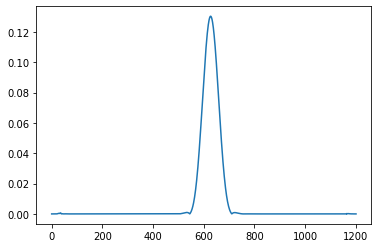

In [6]:
plt.plot(np.abs(opt.get_complex_array(theta)))
opt.get_observables(theta, N, alpha, G, H, l)